# *ADMISSION PREDICTION*

In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#read the file
df = pd.read_csv('college admission prediction.csv')

#print the head
df.head()

,Year,10th Marks,12th Marks,12th Division,JEE Rank,College
0,2015,95,92,2,100,IIT delhi
1,2015,75,88,3,1023,VIT vellore
2,2015,83,84,6,2935,Ahemedabad IT
3,2015,75,91,8,5647,University college of ENGG
4,2015,94,94,9,3564,SRMIST chennai


In [3]:
df


,Year,10th Marks,12th Marks,12th Division,JEE Rank,College
0,2015,95,92,2,100,IIT delhi
1,2015,75,88,3,1023,VIT vellore
2,2015,83,84,6,2935,Ahemedabad IT
3,2015,75,91,8,5647,University college of ENGG
4,2015,94,94,9,3564,SRMIST chennai
...,...,...,...,...,...,...
999,2019,89,81,3,4523,IIT jodhpur
1000,2019,93,88,1,5511,BIT Mesra
1001,2019,86,93,1,100,IIT Bombay
1002,2019,85,89,9,515,IIT hydrabad


In [4]:
college=np.unique(df['College'])
print(college)
clg_code=[]
for i in range(len(college)):
    clg_code.append(i+1)
# clg_code
df['College']=df['College'].replace(college,clg_code)
bak_college=np.array(df['College'])
df.head()

['Ahemedabad IT' 'BIT Mesra' 'BITS pilani' 'BMS college of ENGG'
 'DTU delhi' 'HBUT kanpur' 'IIEST shibpur' 'IIIT hydrabad' 'IIT Bombay'
 'IIT bhilai' 'IIT delhi' 'IIT goa' 'IIT guwahati' 'IIT hydrabad'
 'IIT indore' 'IIT jammu' 'IIT jodhpur' 'IIT kanpur' 'IIT kharagpur'
 'IIT mandi' 'IIT palakkad' 'IIT ropar' 'IIT tirupati'
 'Jadavpur Univversity' 'KLEF hydrabad' 'MNIT jaipur' 'MNNIT allahabad'
 'MSIT' 'Manipal IT' 'NIT trichy' 'NIT warangal' 'NMIMS'
 'Netaji Subhas IT' 'S O A  university' 'SRMIST chennai'
 'SSN college of ENGG' 'University college of ENGG' 'VIT vellore']


,Year,10th Marks,12th Marks,12th Division,JEE Rank,College
0,2015,95,92,2,100,11
1,2015,75,88,3,1023,38
2,2015,83,84,6,2935,1
3,2015,75,91,8,5647,37
4,2015,94,94,9,3564,35


In [5]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# Using only one feature
x = df.iloc[:, 4].values
y = df.iloc[:, 5].values

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.98, random_state=0)

print('Shape of X_train:: ', x_train.shape)
print('Shape of y_train:: ', y_train.shape)
print('Shape of X_test:: ', x_test.shape)
print('Shape of y_test:: ', y_test.shape)

x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print('\nShape of X_train:: ', x_train.shape)
print('Shape of y_train:: ', y_train.shape)
print('Shape of X_test:: ', x_test.shape)
print('Shape of y_test:: ', y_test.shape)

Shape of X_train::  (20,)
Shape of y_train::  (20,)
Shape of X_test::  (984,)
Shape of y_test::  (984,)

Shape of X_train::  (20, 1)
Shape of y_train::  (20,)
Shape of X_test::  (984, 1)
Shape of y_test::  (984,)


Coefficient: [-0.00063625]
RMSE: 11.53


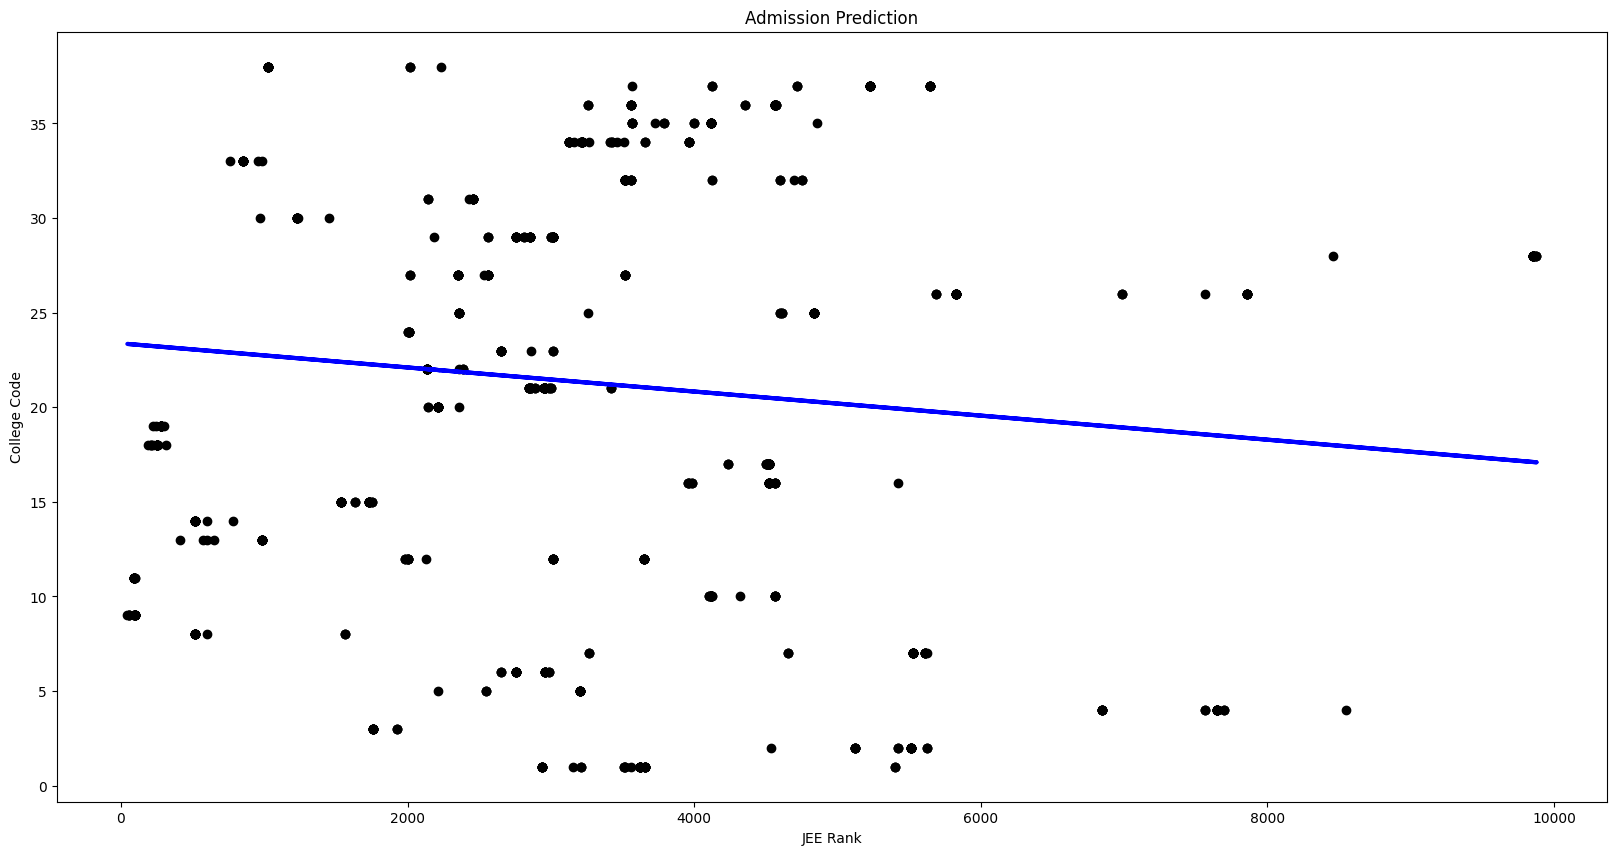

[22.01816288 19.66974675 21.19739431 23.04889551 21.33991536 21.45825874
 21.19993933 23.1965066  18.50794565 21.33991536 23.317395   19.87016698
 22.01816288 21.74711838 21.04978322 22.72567812 20.5006954  20.75519728
 21.45825874 20.50578544 21.50915912 22.83320517 23.04889551 21.81392512
 22.11678236 21.13695011 19.75691365 21.05296449 20.5006954  22.72567812
 21.13695011 21.11022741 19.66974675 17.10564027 21.81392512 22.7498558
 23.31930376 21.45762248 20.75519728 21.81392512 19.8587144  19.87016698
 22.10405727 20.5006954  23.1965066  21.33164405 21.55369695 21.58741844
 18.50794565 23.21114046 21.56260451 21.74520961 23.1965066  20.4739727
 20.49878664 21.3310078  23.31294122 19.80590526 21.00588164 22.25866716
 21.33991536 20.49878664 21.46843881 21.46843881 22.59270089 21.47671013
 23.23531814 21.07332464 22.40118822 21.13695011 21.4601675  22.15114012
 18.37814969 20.75519728 23.21432174 19.66974675 21.04978322 21.3310078
 21.13695011 20.11703381 19.8587144  21.4601675  22.01

In [7]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Coefficient:', model.coef_)
print("RMSE: %.2f" % np.sqrt(np.mean((model.predict(x_test) - y_test) ** 2)))

plt.figure(figsize=(20,10))
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xlabel("JEE Rank")
plt.ylabel("College Code")
plt.title("Admission Prediction")
plt.show()
print(y_pred)

In [10]:
col = df.columns[4]
print(col)
usrip = []
for i in col:
    print("==================================================")
    usrip.append(input(i + ": "))

userpreddt = model.predict([usrip])
print("You may have a chance to get entrance in:", college[clg_code.index(int(userpreddt[0]))])


JEE Rank


: 

In [8]:
import pickle
pickle.dump(model, open('model.pkl','wb'))